In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.15


## Iris

In [2]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.2)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [3]:
len(data.targets),len(data_train.targets),len(data_test.targets),

(150, 120, 30)

In [4]:
C=Perceptron()

In [5]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.035446882247924805 seconds ')


In [6]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 81.666666666666671)
('On Test Set:', 90.0)


In [7]:
C.coef_  # these are the weights

array([[ -7.2,  -3.5,   2.5,   4.5],
       [ 18.3, -53.1,   9.6, -42.9],
       [ 81.8,  81.8, -53. , -57.1]])

In [8]:
C=BackProp(hidden_layer_sizes = [4])

In [9]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.05725812911987305 seconds ')


In [10]:
data_train.vectors.shape,data_train.targets.shape

((120, 4), (120,))

In [11]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 98.333333333333329)
('On Test Set:', 100.0)


In [12]:
W_inp_hid,W_hid_out=C.layers_coef_
print(W_inp_hid)
print("==")
print(W_hid_out)

[[-1.04915481 -0.97436418  3.97065607 -0.5711474 ]
 [-4.22355482 -0.73873612  2.49831749  0.72097315]
 [ 1.2730454  -0.79532932  1.94092953 -0.15529774]
 [ 1.66521576 -1.46339164 -0.44028484 -0.10168391]]
==
[[  5.72342527e+00  -6.84128466e-01  -4.06726428e+00]
 [ -6.17097652e-01   4.78418992e-02   4.77952483e-03]
 [ -3.61005321e+00   1.35735253e+00   2.90309128e+00]
 [ -2.14691939e-01  -3.78935675e-01   6.07347178e-01]]


## XOR Problem - Perceptron

In [13]:
data=load_csv('data/xor.csv')
print() 
print((data.vectors))
print() 
print((data.targets))

4 vectors of length 2
Feature names: 'p1', 'p2'
Target values given.
Target names: '0', '1'
Mean:  [ 0.5  0.5]
Median:  [ 0.5  0.5]
Stddev:  [ 0.5  0.5]

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [14]:
C=Perceptron()

In [15]:
C.fit(data.vectors,data.targets)

In [16]:
print((C.predict(data.vectors)))

[0 0 0 0]


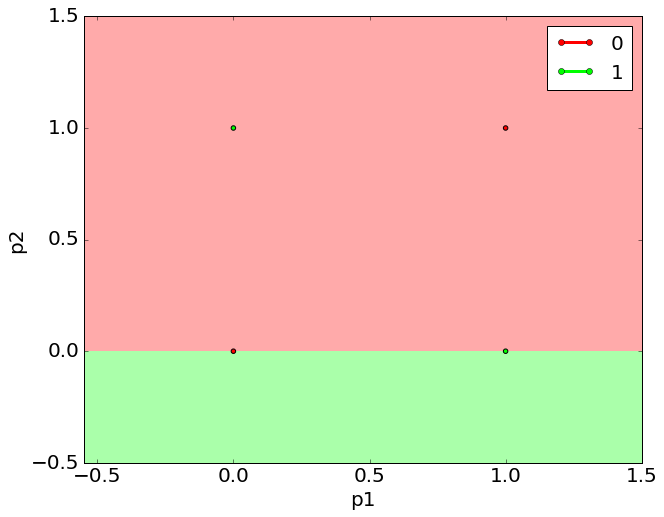

In [17]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

## XOR Problem - Backprop

In [18]:
data.vectors

array([[ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  1.]])

In [19]:
data.targets

array([0, 1, 1, 0])

In [20]:
C=BackProp(hidden_layer_sizes = [4])

In [21]:
C.fit(data.vectors,data.targets)

In [22]:
print((C.predict(data.vectors)))

[1 1 0 0]


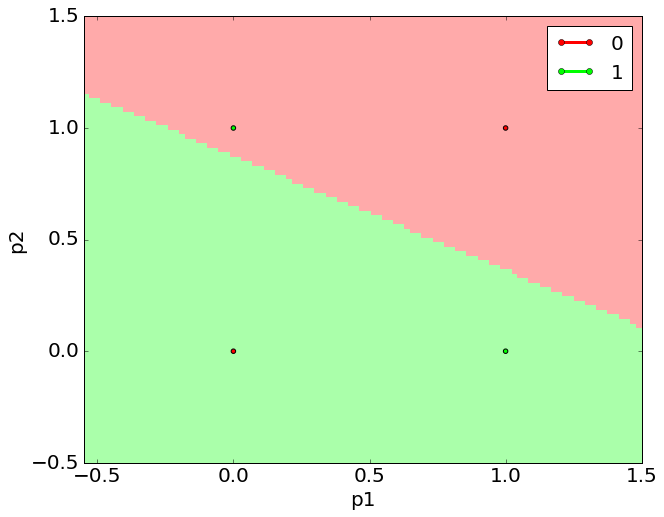

In [23]:
plot2D(data,classifier=C,axis_range=[-.55,1.5,-.5,1.5])

In [24]:
print((data.vectors))
print()
print((data.targets))

[[ 0.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  1.]]

[0 1 1 0]


In [25]:
C._decision_scores(data.vectors)

array([[  1.96478154e-04],
       [  7.98469232e-05],
       [ -3.11388857e-05],
       [ -1.47770116e-04]])

In [26]:
h,y=C.output(data.vectors)
print(h)
print() 
print((np.round(h)))
print()
print(y)

[[ 0.50311937  0.98829944  0.59427133  0.        ]
 [ 0.51760317  0.99641404  0.57944204  0.        ]
 [ 0.53947523  0.95961129  0.53648718  0.        ]
 [ 0.55395903  0.96772589  0.52165789  0.        ]]

[[ 1.  1.  1.  0.]
 [ 1.  1.  1.  0.]
 [ 1.  1.  1.  0.]
 [ 1.  1.  1.  0.]]

[[  1.96478154e-04]
 [  7.98469232e-05]
 [ -3.11388857e-05]
 [ -1.47770116e-04]]


In [27]:
C.layers_coef_

[array([[ 0.01448381,  0.0081146 , -0.01482929, -0.01573933],
        [ 0.03635586, -0.02868815, -0.05778415, -0.01845385]]),
 array([[-0.02784891],
        [ 0.00551195],
        [-0.01631903],
        [ 0.00432915]])]

## 8x8 - Autoencoder

In [28]:
vectors=eye(8)
targets=arange(1,9)
print((vectors,targets))

(array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]), array([1, 2, 3, 4, 5, 6, 7, 8]))


In [29]:
C=BackProp(activation='logistic',hidden_layer_sizes = [3],tol=1e-11)
C.fit(vectors,targets)
print((C.predict(vectors)))

[1 2 3 4 5 6 7 8]


In [30]:
h,y=C.output(vectors)

In [31]:
h

array([[ 0.06968896,  0.02535417,  0.0229651 ],
       [ 0.02593471,  0.96824349,  0.97460038],
       [ 0.97161094,  0.97910869,  0.96305342],
       [ 0.97545615,  0.95294663,  0.02152774],
       [ 0.95008996,  0.03529274,  0.98666779],
       [ 0.03315808,  0.97598072,  0.02187985],
       [ 0.97698746,  0.01484107,  0.04018776],
       [ 0.02194995,  0.02938564,  0.97409241]])

In [32]:
h.round()

array([[ 0.,  0.,  0.],
       [ 0.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [33]:
y.round()

array([[ 11.,  -3., -11.,  -3.,  -3.,   3.,   3.,   3.],
       [ -4.,  11.,   4.,  -4.,  -3.,   4., -12.,   4.],
       [-10.,   3.,  11.,   4.,   4.,  -3.,  -4.,  -5.],
       [ -3.,  -4.,   4.,  11.,  -3.,   4.,   4., -12.],
       [ -3.,  -3.,   4.,  -4.,  10., -11.,   3.,   3.],
       [  4.,   4.,  -3.,   4., -10.,  11.,  -5.,  -4.],
       [  4., -11.,  -4.,   4.,   3.,  -4.,  11.,  -5.],
       [  4.,   4.,  -4., -11.,   4.,  -4.,  -5.,  11.]])

In [34]:
C.predict(vectors)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [35]:
y.shape

(8, 8)

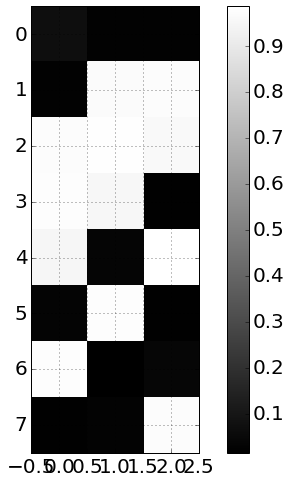

In [36]:
imshow(h,interpolation='nearest',cmap=cm.gray)
colorbar()

In [37]:
weights_xh,weights_hy=C.layers_coef_

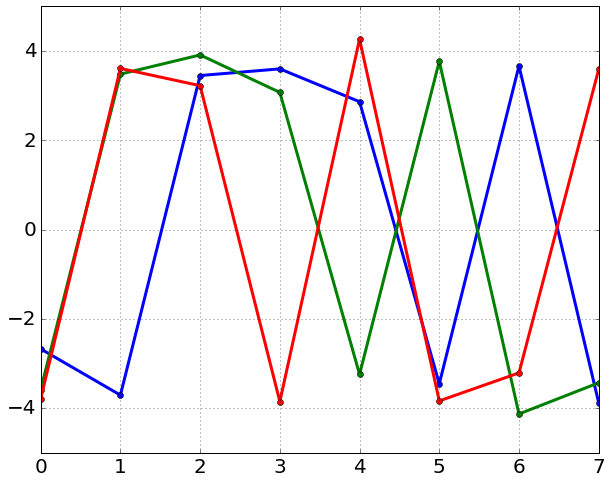

In [38]:
plot(weights_xh,'-o')

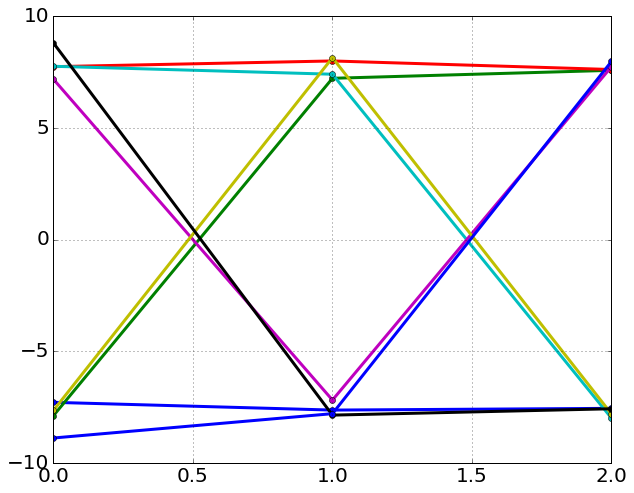

In [39]:
plot(weights_hy,'-o')

## Tuning the number of hidden units

In [40]:
data=load_excel('data/iris.xls')
data_train,data_test=split(data,test_size=0.75)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]
Original vector shape:  (150, 4)
Train vector shape:  (37, 4)
Test vector shape:  (113, 4)


select which number of hidden units to use

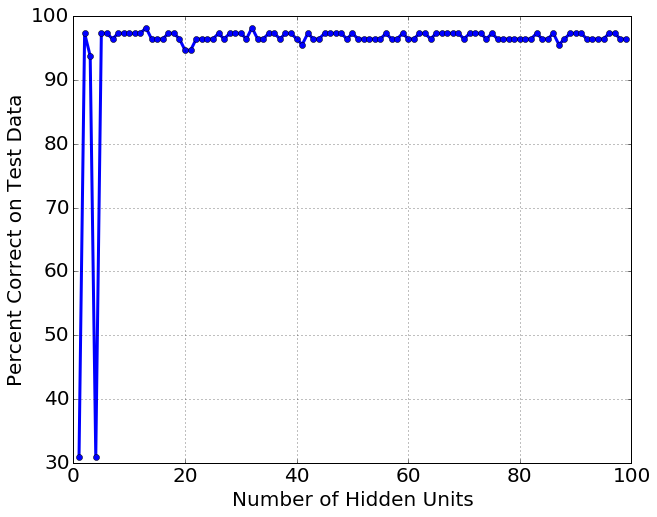

In [41]:
hidden=list(range(1,100))
percent_correct=[]
for n in hidden:
    C=BackProp(hidden_layer_sizes = [n])
    C.fit(data_train.vectors,data_train.targets)
    percent_correct.append(C.percent_correct(data_test.vectors,data_test.targets))
    
plot(hidden,percent_correct,'-o')
xlabel('Number of Hidden Units')
ylabel('Percent Correct on Test Data')